# Titanic Kaggle

### import de la base titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

C:\Users\natacha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import des données
data_train = pd.read_csv('train.csv')

In [3]:
# Pour avoir des infos sur la base
#df_titanic.describe()
#df_titanic.info()
#df_titanic.dtypes

In [4]:
def prepareData(df):
    df = pd.DataFrame(df)
    
    df['Age'] = df['Age'].fillna(np.mean(df['Age']))
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Fare'] = df['Fare'].fillna(np.mean(df['Fare']))    
    
    le = preprocessing.LabelEncoder()
    le.fit(df['Sex'])
    df['Sex'] = le.transform(df['Sex'])

    le.fit(df['Embarked'])
    df['Embarked'] = le.transform(df['Embarked'])
    
    df = pd.get_dummies(df, columns=['Sex'])

    return df

data_train = prepareData(data_train)
    

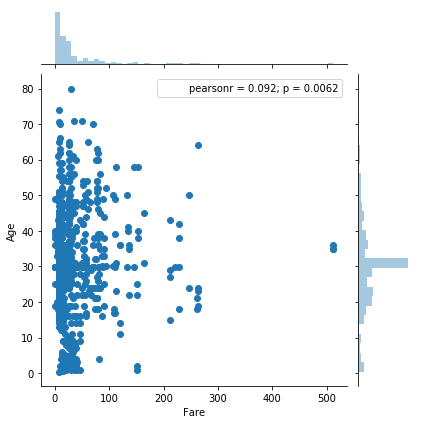

In [5]:

sns.jointplot(x='Fare',y='Age',data=data_train)
plt.show()

In [6]:
data_train['Fare'] = preprocessing.scale(data_train['Fare'])

data_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,-0.502445,NaN,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.786845,C85,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,-0.488854,NaN,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.420730,C123,2,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,-0.486337,NaN,2,0,1


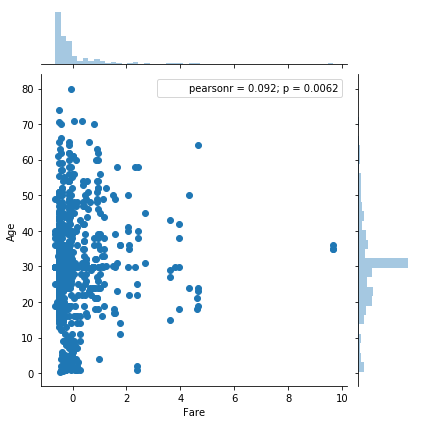

In [7]:
sns.jointplot(x='Fare',y='Age',data=data_train)
plt.show()

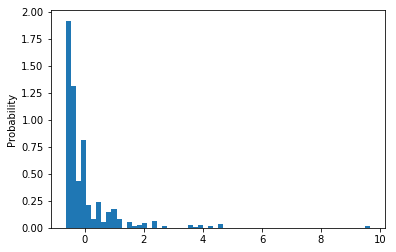

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = data_train['Fare']
plt.hist(x, normed=True, bins=60)
plt.ylabel('Probability');

Text(0,0.5,'Frequency')

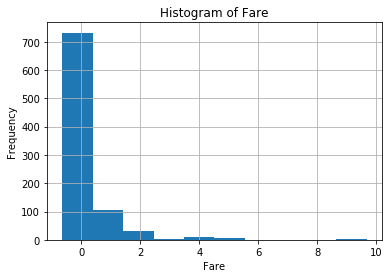

In [9]:
data_train.Fare.hist()
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

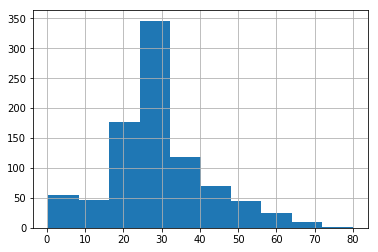

In [10]:
data_train.Age.hist()

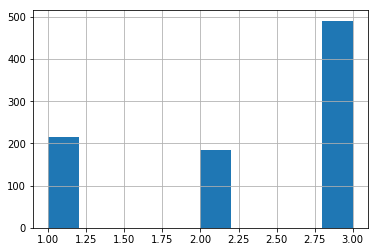

In [11]:
data_train.Pclass.hist()

Text(0,0.5,'Frequency')

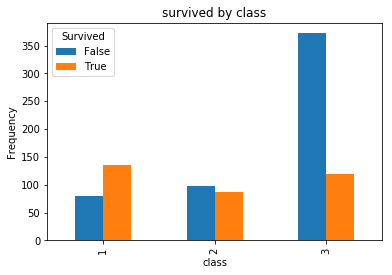

In [12]:
# barplot of age grouped by survived (True or False)
pd.crosstab(data_train.Pclass, data_train.Survived.astype(bool)).plot(kind='bar')
plt.title('survived by class')
plt.xlabel('class')
plt.ylabel('Frequency')

In [13]:
data_train_target = data_train[['Survived']]
data_train_data = data_train.drop(['Survived','PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
data_train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1
0,3,22.0,1,0,-0.502445,2,0,1
1,1,38.0,1,0,0.786845,0,1,0
2,3,26.0,0,0,-0.488854,2,1,0
3,1,35.0,1,0,0.420730,2,1,0
4,3,35.0,0,0,-0.486337,2,0,1


In [14]:
# Préparation du jeu de données test
data_test = pd.read_csv('test.csv')
prepareData(data_test)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_0,Sex_1
0,892,3,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,NaN,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,NaN,2,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,NaN,1,0,1
3,895,3,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,NaN,2,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,NaN,2,1,0
5,897,3,"Svensson, Mr. Johan Cervin",14.00000,0,0,7538,9.2250,NaN,2,0,1
6,898,3,"Connolly, Miss. Kate",30.00000,0,0,330972,7.6292,NaN,1,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.00000,1,1,248738,29.0000,NaN,2,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.00000,0,0,2657,7.2292,NaN,0,1,0
9,901,3,"Davies, Mr. John Samuel",21.00000,2,0,A/4 48871,24.1500,NaN,2,0,1


In [15]:
#df_titanic_test_data = df_titanic_test[["Pclass", 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data_test_data = data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 1)
print(data_test_data.head())


   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         1
1       3    0  47.0      1      0   7.0000         2
2       2    1  62.0      0      0   9.6875         1
3       3    1  27.0      0      0   8.6625         2
4       3    0  22.0      1      1  12.2875         2


In [16]:
# this is our test set

X = data_train_data
y = data_train_target

# flatten y into a 1-D array
y = np.ravel(y)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:

#Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
model_LR.score(X_train, y_train)

predicted_LR = model_LR.predict(X_test)

#données à soumettre à Kaggle
predicted2_LR = model_LR.predict(data_test_data)

# generate class probabilities
probs = model_LR.predict_proba(X_test)
#print (probs)

# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))


ValueError: X has 7 features per sample; expecting 8

In [ ]:
#Bayes Model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
model_NB.score(X_train, y_train)

predicted_NB = model_NB.predict(X_test)

# generate class probabilities
probs_NB = model_NB.predict_proba(X_test)
#print (probs)

# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted_NB))
print (metrics.roc_auc_score(y_test, probs_NB[:, 1]))

In [ ]:
#pour envoyer les données à Kaggle
sub = pd.read_csv('gender_submission.csv')
sub = pd.DataFrame(sub)
sub['Survived'] = predicted2_LR
sub.to_csv('gender_submission_nat', encoding='utf-8', index=False)